In [1]:
!pip install numpy pandas matplotlib ucimlrepo scikit-learn tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
rice = fetch_ucirepo(id=545)
rice

{'data': {'ids': None,
  'features':        Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
  0     15231  525.578979         229.749878          85.093788      0.928882   
  1     14656  494.311005         206.020065          91.730972      0.895405   
  2     14634  501.122009         214.106781          87.768288      0.912118   
  3     13176  458.342987         193.337387          87.448395      0.891861   
  4     14688  507.166992         211.743378          89.312454      0.906691   
  ...     ...         ...                ...                ...           ...   
  3805  11441  415.858002         170.486771          85.756592      0.864280   
  3806  11625  421.390015         167.714798          89.462570      0.845850   
  3807  12437  442.498993         183.572922          86.801979      0.881144   
  3808   9882  392.296997         161.193985          78.210480      0.874406   
  3809  11434  404.709992         161.079269          90.868195      0.825

In [4]:
X = rice.data.features
y = rice.data.targets

#видим, что у нас бин классификация
y['Class'].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [5]:
X = X.values.astype(np.float32)
le = LabelEncoder()

# кодируем в 0/1, т.к. у нас бинарная классфикация (Cammeo/Osmancik)
y_encoded = le.fit_transform(y.values.ravel())

# стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Форма данных: {X_scaled.shape}")
print(f"Классы: {le.classes_}")

Форма данных: (3810, 7)
Классы: ['Cammeo' 'Osmancik']


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.0130 - val_loss: 0.6386
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6626 - val_loss: 0.5788
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6386 - val_loss: 0.5701
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6057 - val_loss: 0.5648
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5969 - val_loss: 0.5638
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6050 - val_loss: 0.5596
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5923 - val_loss: 0.5569
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5696 - val_loss: 0.5536
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5671 - val_loss: 0.5528
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5758 - val_loss: 0.5497
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5820 - val_loss: 0.5492
Epoch 12/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6

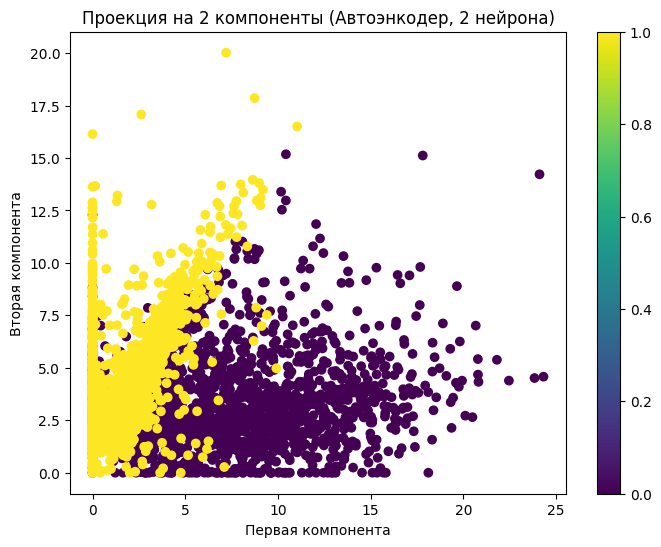

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Создание автоэнкодера
def my_autoencoder(latent_dim):
    input_layer = layers.Input(shape=(X_train.shape[1],))
    encoder = layers.Dense(128, activation='relu')(input_layer)
    encoder = layers.Dense(64, activation='relu')(encoder)
    encoder = layers.Dense(latent_dim, activation='relu')(encoder)

    decoder = layers.Dense(64, activation='relu')(encoder)
    decoder = layers.Dense(128, activation='relu')(decoder)
    output_layer = layers.Dense(X_train.shape[1], activation='sigmoid')(decoder)

    autoencoder = models.Model(input_layer, output_layer)
    encoder_model = models.Model(input_layer, encoder)

    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder_model

# с обучение автоенкодера с 2-мя нейронами
autoencoder_2, encoder_model_2 = my_autoencoder(latent_dim=2)
autoencoder_2.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test), verbose=1)

# проекция данных на 2 компоненты
encoded_data_2 = encoder_model_2.predict(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_data_2[:, 0], encoded_data_2[:, 1], c=y_encoded, cmap='viridis')
plt.colorbar(scatter)
plt.title('Проекция на 2 компоненты (Автоэнкодер, 2 нейрона)')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9497 - val_loss: 0.5482
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5706 - val_loss: 0.5182
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5496 - val_loss: 0.5160
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5612 - val_loss: 0.5154
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5372 - val_loss: 0.5143
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5605 - val_loss: 0.5145
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5594 - val_loss: 0.5142
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5348 - val_loss: 0.5145
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5390 - val_loss: 0.5137
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5635 - val_loss: 0.5143
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5405 - val_loss: 0.5140
Epoch 12/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5

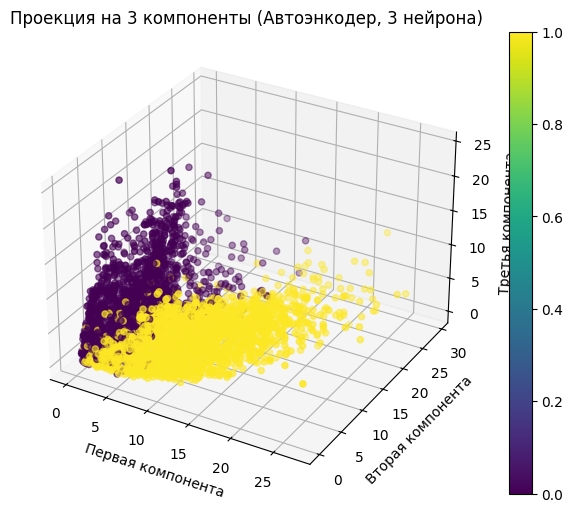

In [ ]:
# с обучение автоенкодера с 2-мя нейронами
autoencoder_3, encoder_model_3 = my_autoencoder(latent_dim=3)
autoencoder_3.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test), verbose=1)

# проекция данных на 3 компоненты
encoded_data_3 = encoder_model_3.predict(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(encoded_data_3[:, 0], encoded_data_3[:, 1], encoded_data_3[:, 2], c=y_encoded, cmap='viridis')
ax.set_title('Проекция на 3 компоненты (Автоэнкодер, 3 нейрона)')
ax.set_xlabel('Первая компонента')
ax.set_ylabel('Вторая компонента')
ax.set_zlabel('Третья компонента')
fig.colorbar(scatter)
plt.show()

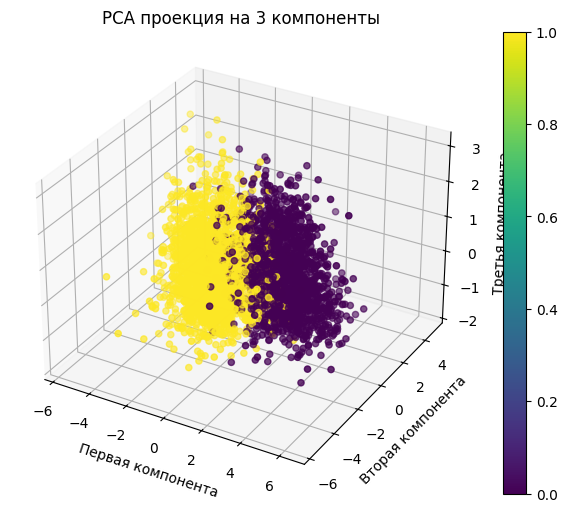

In [ ]:
# PCA для 3 компонент
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=y_encoded, cmap='viridis')
ax.set_title('PCA проекция на 3 компоненты')
ax.set_xlabel('Первая компонента')
ax.set_ylabel('Вторая компонента')
ax.set_zlabel('Третья компонента')
fig.colorbar(scatter)
plt.show()


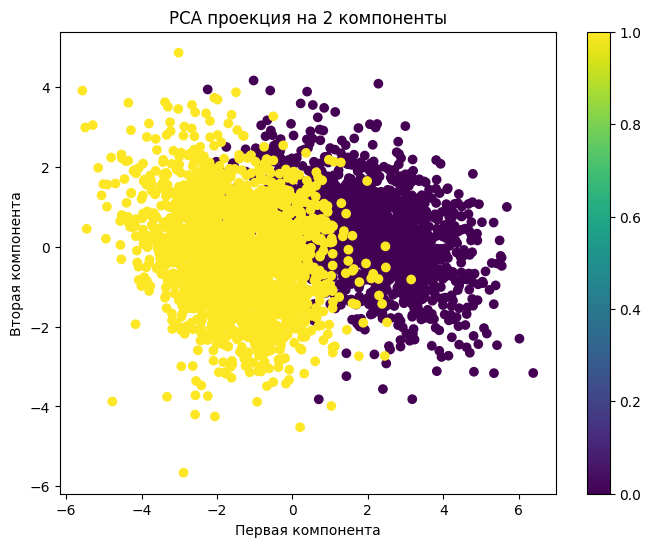

In [ ]:
# PCA для 2 компонент
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y_encoded, cmap='viridis')
plt.colorbar(scatter)
plt.title('PCA проекция на 2 компоненты')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()

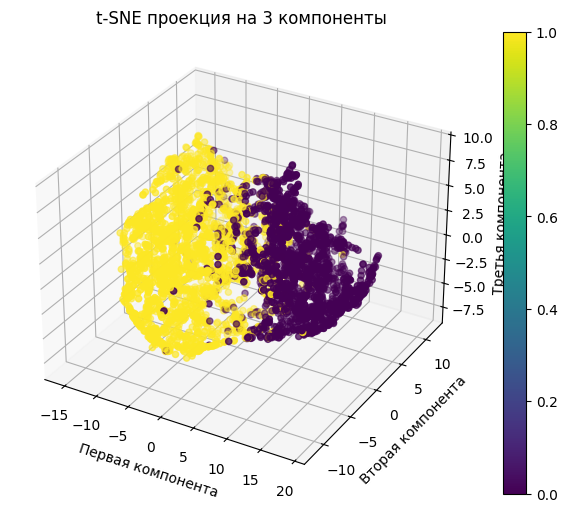

In [ ]:
# Применение t-SNE для 3 компоненты
tsne_3 = TSNE(n_components=3, random_state=42)
X_tsne_3 = tsne_3.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_3[:, 0], X_tsne_3[:, 1], X_tsne_3[:, 2], c=y_encoded, cmap='viridis')
ax.set_title('t-SNE проекция на 3 компоненты')
ax.set_xlabel('Первая компонента')
ax.set_ylabel('Вторая компонента')
ax.set_zlabel('Третья компонента')
fig.colorbar(scatter)
plt.show()

In [ ]:
# Применение t-SNE для 2 компоненты
tsne_2 = TSNE(n_components=2, random_state=42)
X_tsne_2 = tsne_2.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne_2[:, 0], X_tsne_2[:, 1], c=y_encoded, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE проекция на 2 компоненты')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()

Потери при PCA (2 компоненты): 0.1316


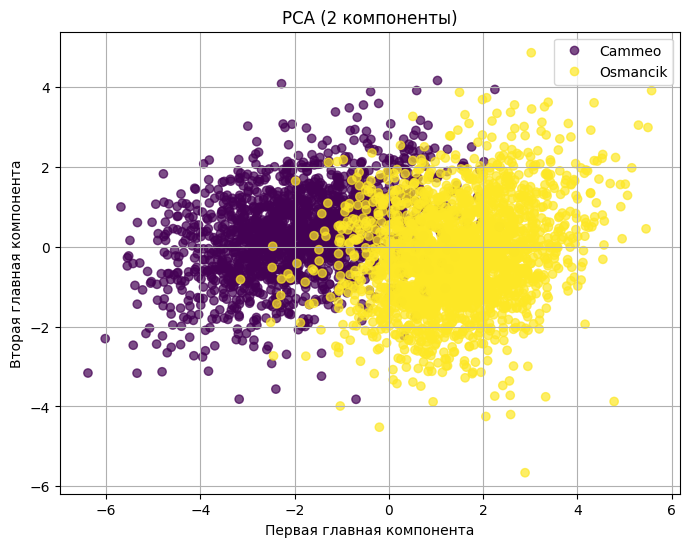

Потери при PCA (3 компоненты): 0.0029


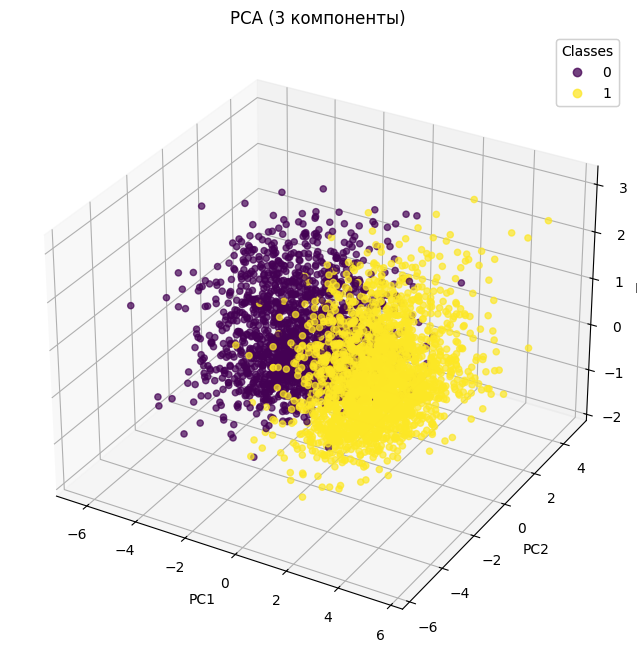

In [ ]:
def pca_custom(X: np.array, n_components: int):
    math_expectation = np.mean(X, axis=0)
    X_centered = X - math_expectation
    cov_matrix = np.cov(X_centered.T)
    eig_val, eig_vect = np.linalg.eig(cov_matrix)
    sort_indices = np.argsort(-eig_val)
    eig_val_sorted = eig_val[sort_indices]
    eig_vect_sorted = eig_vect[:, sort_indices]
    full_variance = np.sum(eig_val_sorted)
    compressed_variance = np.sum(eig_val_sorted[:n_components])
    loss = 1 - compressed_variance / full_variance
    X_pca = np.dot(X_centered, eig_vect_sorted[:, :n_components])
    return X_pca, loss

# применяем PCA (2 компоненты)
X_pca_2_custom, loss_2_custom = pca_custom(X_scaled, 2)
print(f"Потери при PCA (2 компоненты): {loss_2_custom:.4f}")


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2_custom[:, 0], X_pca_2_custom[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.title('PCA (2 компоненты)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend(handles=scatter.legend_elements()[0], labels=le.classes_.tolist())
plt.grid(True)
plt.show()

# применяем PCA (3 компоненты)
X_pca_3_custom, loss_3_custom = pca_custom(X_scaled, 3)
print(f"Потери при PCA (3 компоненты): {loss_3_custom:.4f}")

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3_custom[:, 0], X_pca_3_custom[:, 1], X_pca_3_custom[:, 2], c=y_encoded, cmap='viridis', alpha=0.7)
ax.set_title('PCA (3 компоненты)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
plt.show()